In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import numpy as np
import scipy.stats as stats
from cmdstanpy import CmdStanModel

In [88]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [89]:
result = model.sample(data={'N':1, 'y':[1]},
                        seed = 14071999,
                        chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [90]:
print(result.diagnose())

Processing csv files: C:\Users\JASKIE~1\AppData\Local\Temp\tmpnoeojvsm\stan1-20220315121308_1.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmpnoeojvsm\stan1-20220315121308_2.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmpnoeojvsm\stan1-20220315121308_3.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmpnoeojvsm\stan1-20220315121308_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
176 of 4000 (4.40%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [91]:
avriz_result = az.from_cmdstanpy(
    posterior=result
)

post = avriz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
avriz_result 

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

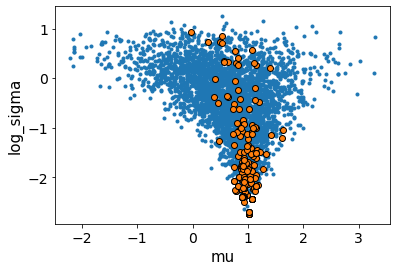

In [92]:
az.plot_pair(avriz_result, var_names=['mu', 'log_sigma'], divergences=True)

Excercise 2

In [101]:
data = pd.read_csv('coin.csv')
N=len(data.columns.experiment)


,Experiment_Id,Toss_Result
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,1
416,1308,0


In [105]:
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : N, "y" : y},
                            seed = 1471999,
                            chains = 4)
result.summary()

INFO:cmdstanpy:found newer exe file, not recompiling


ValueError: data must be string or dict

In [95]:
result.summary()


Inference data with groups:
	> sample_stats

In [96]:
arviz_result = az.from_cmdstanpy(
    posterior=result,
)
arviz_result

az.plot_density(arviz_result,shade=0.1)

ValueError: Can not extract posterior from Inference data with groups:
	> sample_stats! See C:\Users\Jaskier-PC\anaconda3\envs\Data_Anal\lib\site-packages\arviz\data\converters.py for other conversion utilities.